# Bank Marketing


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [5]:
bank_marketing.variables

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,None,no
1,job,Feature,Categorical,Occupation,"type of job (categorical: 'admin.','blue-colla...",None,no
2,marital,Feature,Categorical,Marital Status,"marital status (categorical: 'divorced','marri...",None,no
3,education,Feature,Categorical,Education Level,"(categorical: 'basic.4y','basic.6y','basic.9y'...",None,no
4,default,Feature,Binary,None,has credit in default?,None,no
5,balance,Feature,Integer,None,average yearly balance,euros,no
6,housing,Feature,Binary,None,has housing loan?,None,no
7,loan,Feature,Binary,None,has personal loan?,None,no
8,contact,Feature,Categorical,None,contact communication type (categorical: 'cell...,None,yes
9,day_of_week,Feature,Date,None,last contact day of the week,None,no


### Bibliotecas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

import seaborn as sns
sns.set_style('whitegrid')

### Fontes

In [4]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 

# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [6]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [7]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


## 1. EDA

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


### __Qual a distribuição de idade dos clientes?__

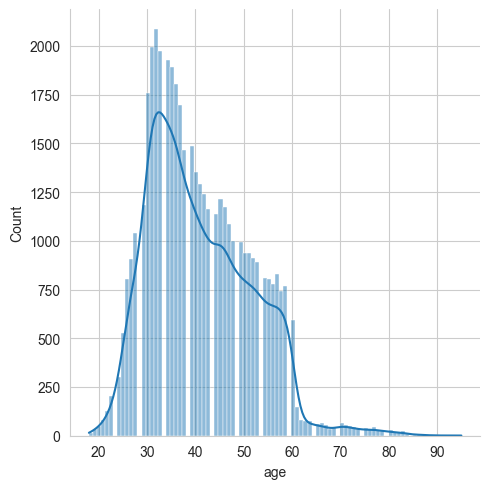

In [9]:
ax1 = sns.displot(data=X, x="age",kde=True)
ax1


Grande parte dos clientes estão entre os 25 aos 60 anos, havendo um pico entre os 30 - 40 anos.

### __Qual é a distribuição das profissões? E qual a profissão mais comum entre os clientes?__

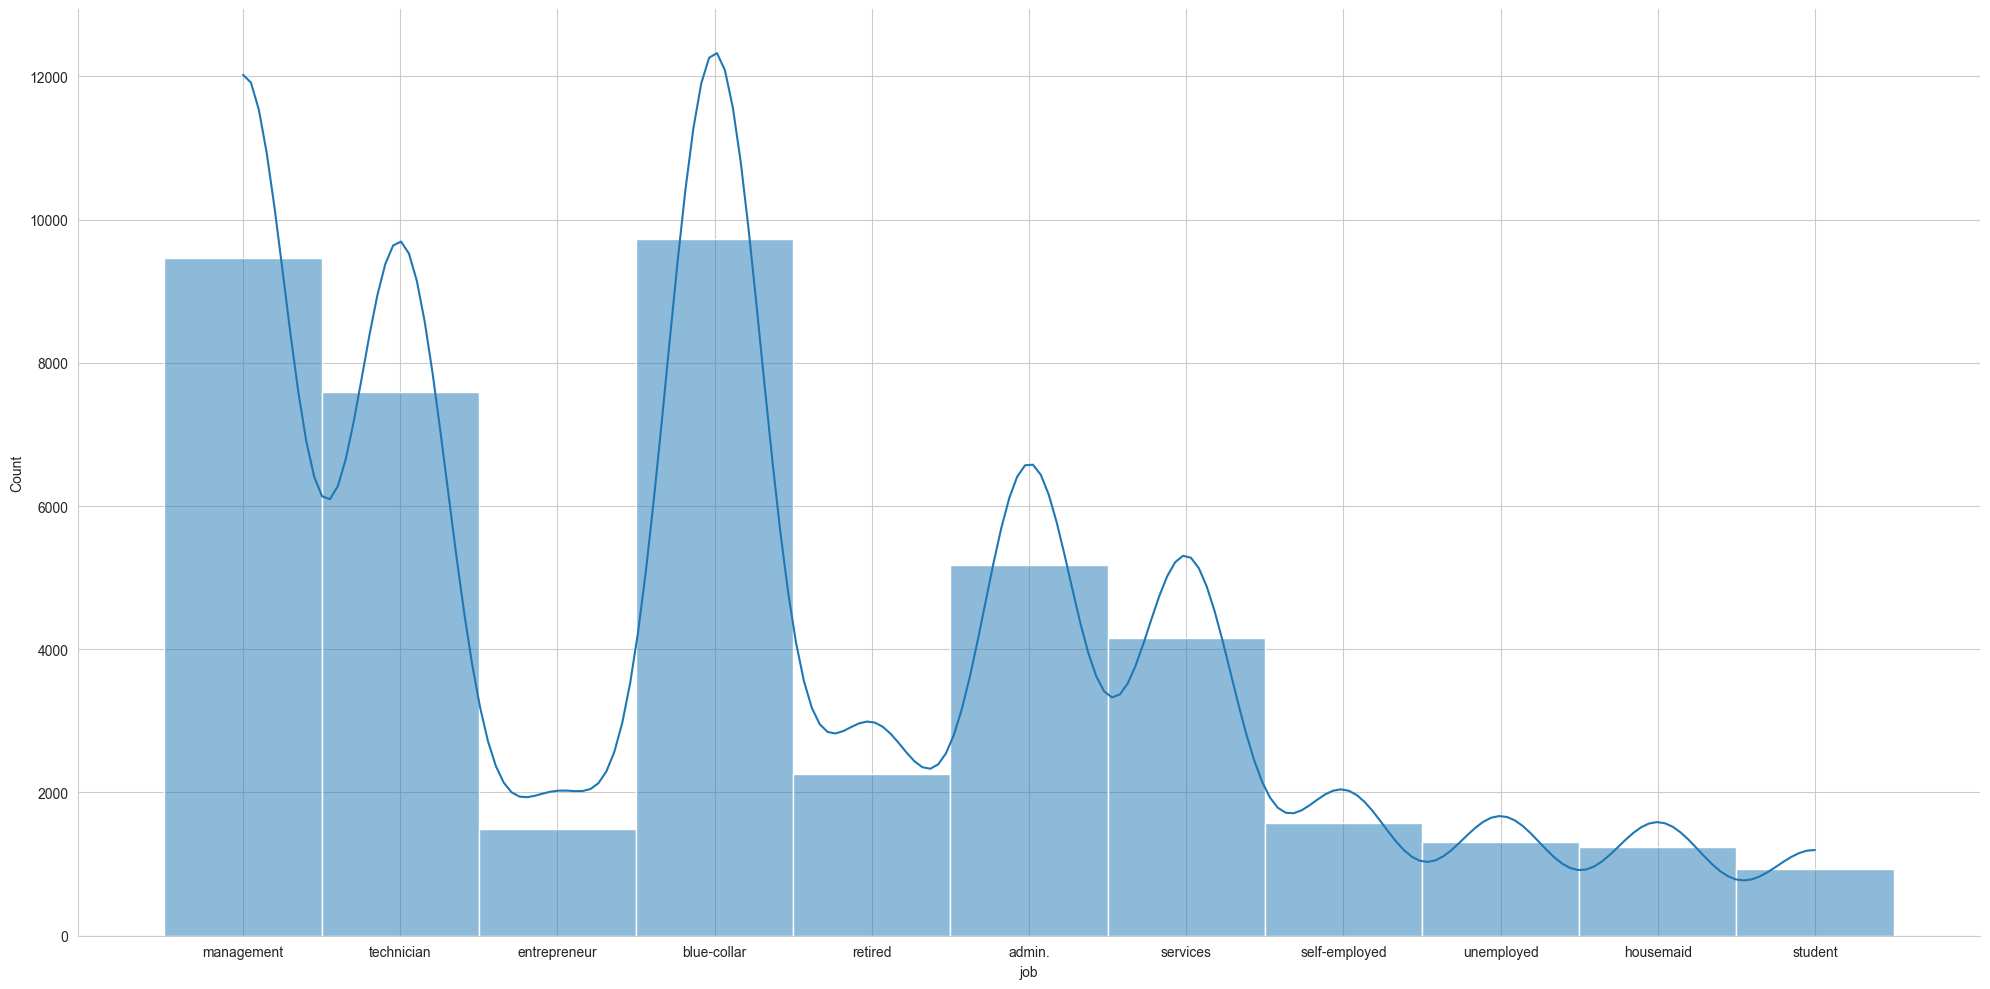

In [10]:
ax2 = sns.displot(data=X, x="job",kde=True, height = 10,  aspect=2)
ax2


A profição mais comum entre os clientes do banco são as do tipo blue-collar. Blue-collar são profissões com foco em trabalhos manuais e braçais como os que atuam nos setores de agricultura, construção, manufatura, mineração ou manutenção da economia.

## __Quais são as principais formas de contato utilizadas pela instituição financeira?__

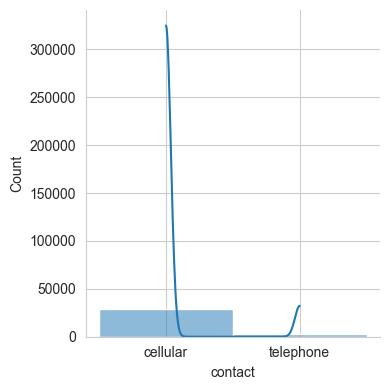

In [11]:
ax3 = sns.displot(data=X, x="contact",kde=True, height = 4,  aspect=1)
ax3

## __Existe alguma relação entre saldo do cliente (balance) e a idade?__

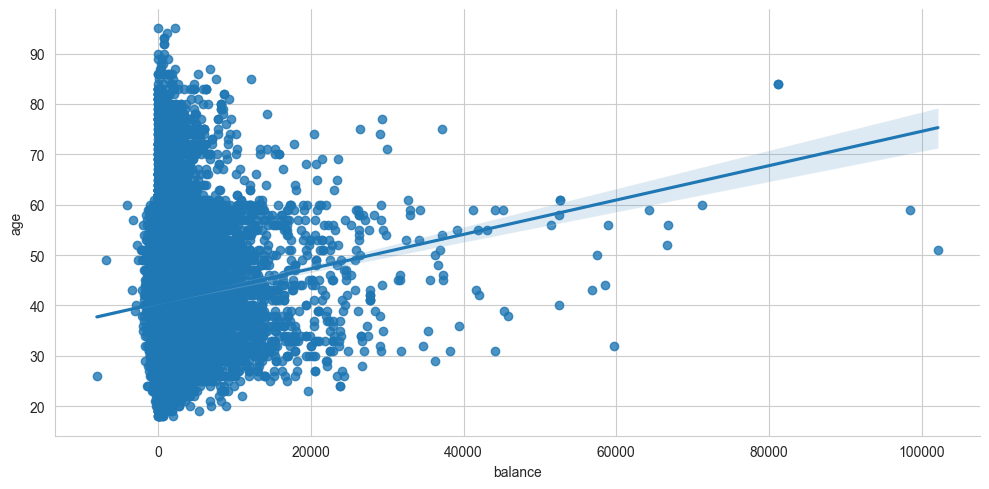

In [12]:
x4 = sns.lmplot(data=X, x="balance", y="age", height = 5,  aspect=2)
x4

Há um aumento consideravel do saldo entre os 30 - 60 anos.

### O saldo bancário possui alguma relação com inadimplência, possuir casa ou possuir empréstimo.

<Axes: xlabel='balance', ylabel='housing'>

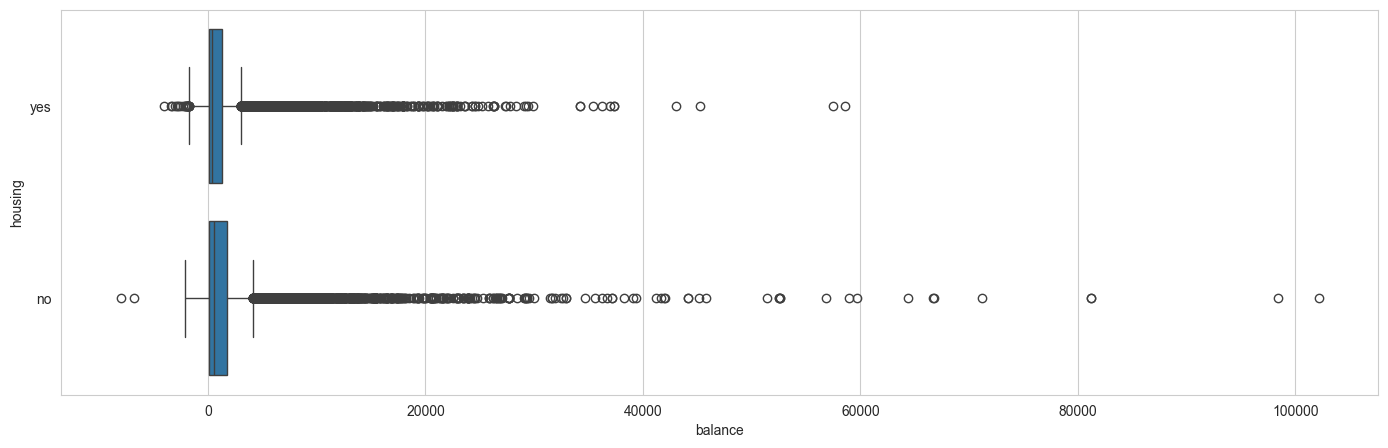

In [13]:
plt.figure(figsize = (17,5))
sns.boxplot (data = X, x = "balance", y = "housing")

<Axes: xlabel='balance', ylabel='loan'>

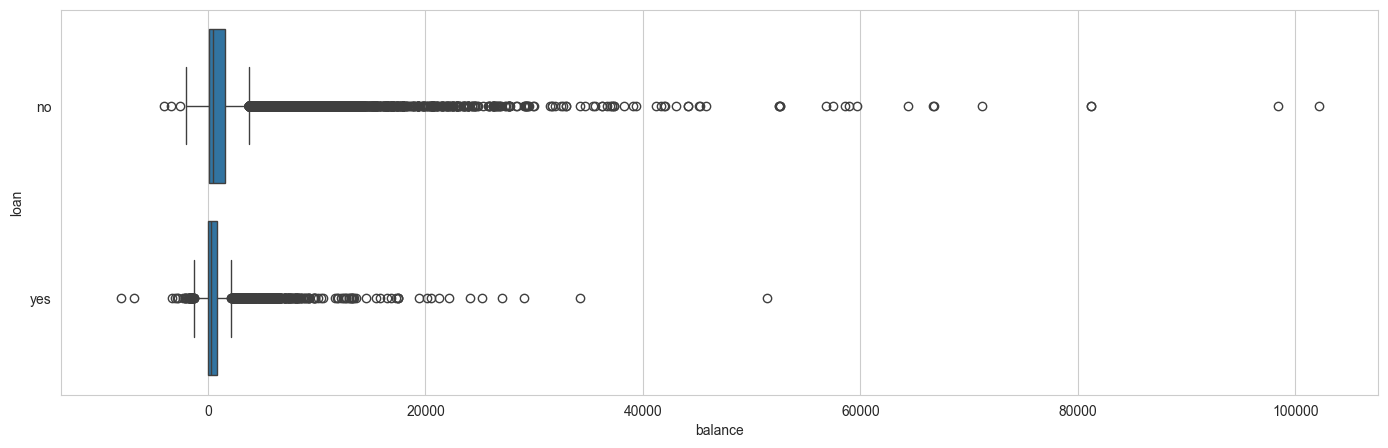

In [14]:
plt.figure(figsize = (17,5))
sns.boxplot (data = X, x = "balance", y = "loan")

Clientes que não possuem casa própria e nem casa tendem a ter um maior saldo(balance)

## __Olhando para a inadimplência, existe diferença na proporção de clientes que obtiveram o produto? E quando olhamos para ter casa e empréstimo? Qual dessas variáveis parece ser mais determinante para um cliente adquirir o produto de depósito que o banco oferece?__

In [15]:
y2 = bank_marketing.data.targets['y'].map({'no': 0, 'yes': 1})
y2

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [16]:
merged_data = pd.concat([X, y2], axis=1)
merged_data

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,0
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,0
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,0
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,0


##### Proporção de Aquisição do produto por Inadiplência

In [17]:
defaultgroupby = merged_data.groupby('default')['y'].sum()
default_percentage = (defaultgroupby / defaultgroupby.sum()) * 100


default_percentage

default
no     99.016827
yes     0.983173
Name: y, dtype: float64

##### Proporção de Aquisição do produto por Pose de Casa

In [18]:
housinggroupby = merged_data.groupby('housing')['y'].sum()
housing_percentage = (housinggroupby / housinggroupby.sum()) * 100


housing_percentage 

housing
no     63.414634
yes    36.585366
Name: y, dtype: float64

#### Proporção de Aquisição do produto por Empréstimo

In [19]:
housinggroupby = merged_data.groupby('loan')['y'].sum()
housing_percentage = (housinggroupby / housinggroupby.sum()) * 100


housing_percentage 

loan
no     90.848932
yes     9.151068
Name: y, dtype: float64

In [20]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

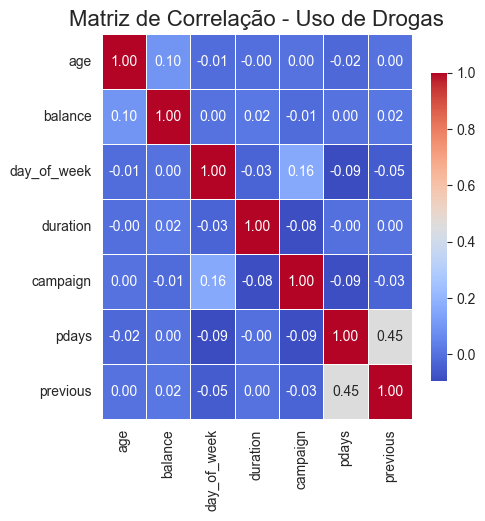

In [21]:
numerics_v = [
    'age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous'
]

correlation_matrix = X[numerics_v].corr()


plt.figure(figsize=(5, 5))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8} 
)


plt.title("Matriz de Correlação - Uso de Drogas", fontsize=16)
plt.show()

In [22]:
educationgroupby = merged_data[['education', 'loan','y']]

educationgroupby 


,education,loan,y
0,tertiary,no,0
1,secondary,no,0
2,secondary,yes,0
3,NaN,no,0
4,NaN,no,0
...,...,...,...
45206,tertiary,no,1
45207,primary,no,1
45208,secondary,no,1
45209,secondary,no,0


# Fonte

https://archive.ics.uci.edu/dataset/222/bank+marketing